# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pylab as plt
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t' )

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

* balcony — число балконов

* ceiling_height — высота потолков (м)

* cityCenters_nearest — расстояние до центра города (м)

* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

* first_day_exposition — дата публикации

* floor — этаж

* floors_total — всего этажей в доме

* is_apartment — апартаменты (булев тип)

* kitchen_area — площадь кухни в квадратных метрах (м²)

* last_price — цена на момент снятия с публикации

* living_area — жилая площадь в квадратных метрах (м²)

* locality_name — название населённого пункта

* open_plan — свободная планировка (булев тип)

* parks_around3000 — число парков в радиусе 3 км

* parks_nearest — расстояние до ближайшего парка (м)

* ponds_around3000 — число водоёмов в радиусе 3 км

* ponds_nearest — расстояние до ближайшего водоёма (м)

* rooms — число комнат

* studio — квартира-студия (булев тип)

* total_area — площадь квартиры в квадратных метрах (м²)

* total_images — число фотографий квартиры в объявлении

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [5]:
data.drop_duplicates().reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,...,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,...,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


In [6]:
data.info()# явных дубликатов в данных нет,после заполнения пропусков можно будте еще раз попробовать удалить дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


***Вывод***


Пройдемся по конкретным столбцам где есть пропущенные значения:
ceiling_height          14504 non-null float64 -высота потолка, в других столбцах нет указаний типов домой и адреса, чтобы точно определить какой это дом, поэтому предлагаю заменить модой(самым частым значением), скорее всего это 2.5 или 2.7 м такая высота обычно в жилье масс сегменте !!!

* living_area             21796 non-null float64 -по студиям будте равна общей площади
* is_apartment            2775 non-null object - нужно заполнить на булевый !!!
* kitchen_area            21421 non-null float64 -по студиям будте равна общей площади
* balcony                 12180 non-null float64 - если нет ставим ноль!!!
* locality_name           23650 non-null object - заполним неизвестным
* airports_nearest        18157 non-null float64 - будем брать от наименование поселка
* cityCenters_nearest     18180 non-null float64 - будем брать от наименование поселка
* parks_around3000        18181 non-null float64 - если пропуски скорее всего их нет(0) !!!
* parks_nearest           8079 non-null float64 - не заполнить
* ponds_around3000        18181 non-null float64  - если пропуски скорее всего их нет(0) !!!
* ponds_nearest           9110 non-null float64 - не заполнить
* days_exposition         20518 non-null float64 - не заполнить

Также есть ошибки:
ceiling_height - высота 100 метров 
floors_total - 60 этажей

## Предобработка данных

Заполним самые простые пропуски в первую очередь

In [8]:
ceiling_height_median =2.7
data['is_apartment'] = data['is_apartment'].fillna(False)# заполняем пропуски в апартаментах на False 
data['balcony'] = data['balcony'].fillna(0) # заполняем пропуски в балконах на ноль
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)#медиана по высоте составляет 2,7 м ей и заполним высоту потолков

Устраним ошибки в данных

In [9]:
data.loc[data['ceiling_height']>35,'ceiling_height'] = 2.7 
data[data['floors_total']>35]
data.loc[data['floors_total'] == 60,'floors_total'] = 6 # поменяем данные на 6 этажей, здесь скорее всего опечатка
data.loc[data['floors_total'] == 52,'floors_total'] = 9 # здесь на среднее
data.loc[data['floors_total'] == 37,'floors_total'] = 36 # скорее всего ошиблись с максимальным этажом(самое высокое здание в спб на 36 этажей)

In [10]:
data[data['ceiling_height']>5]#потолки больше 15 метров даже в частном доме это уж слишком, поменяем их на срденее 2.7
data.loc[data['ceiling_height']>15, 'ceiling_height'] = 2.7

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","23,699.00","23,613.00","21,796.00","23,699.00","21,421.00","23,699.00","18,157.00","18,180.00","23,699.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.72,10.67,34.46,5.89,10.57,0.59,"28,793.67","14,191.28",0.47,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,0.25,6.58,22.03,4.89,5.91,0.96,"12,630.88","8,608.39",0.75,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.70,9.00,30.00,4.00,9.10,0.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.70,16.00,42.30,8.00,12.00,1.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,14.00,36.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


* living_area             21796 non-null float64 - в студиях приравняем к общей площади в остальных пропустим
* kitchen_area            21421 non-null float64 -в студиях приравняем к общей площади в остальных пропустим
* locality_name           23650 non-null object - заполним неизвестным
* airports_nearest        18157 non-null float64 - будем брать от наименование поселка, по тем данным где есть
* cityCenters_nearest     18180 non-null float64 - будем брать от наименование поселкаб, по тем данным где есть

In [12]:
data[(data['living_area'].isna()) & (data['studio'] == True)]
data.loc[(data['living_area'].isna()) & (data['studio'] == True),'living_area'] = data['total_area']
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True),'kitchen_area'] = data['total_area']
data['locality_name'] = data['locality_name'].fillna('unknown')

In [13]:
data_airport = data.pivot_table(index = 'locality_name', values = 'airports_nearest')

data_airport

,airports_nearest
locality_name,
unknown,"24,572.34"
Зеленогорск,"73,300.25"
Колпино,"26,375.86"
Красное Село,"26,595.58"
Кронштадт,"67,469.26"
Ломоносов,"48,308.28"
Павловск,"21,053.34"
Петергоф,"40,184.68"
Пушкин,"16,447.87"


In [14]:
data_cityCenters_nearest = data.pivot_table(index = 'locality_name', values = 'cityCenters_nearest')
data_cityCenters_nearest.loc['unknown'] = 0
data_cityCenters_nearest

,cityCenters_nearest
locality_name,
unknown,0.00
Зеленогорск,"54,617.58"
Колпино,"32,113.77"
Красное Село,"30,020.28"
Кронштадт,"49,195.73"
Ломоносов,"50,739.97"
Павловск,"33,206.92"
Петергоф,"35,468.93"
Пушкин,"28,745.38"


In [15]:
def fill_nan_cityCenters_nearest(locality_name):
    try:
        return data_cityCenters_nearest.loc[locality_name].values[0]
    except:
        data_cityCenters_nearest.loc['unknown'].values[0]
        
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.apply(lambda row: fill_nan_cityCenters_nearest(row['cityCenters_nearest']), axis = 1)) 

In [16]:
def fill_nan_airport(locality_name):
    try:
        return data_airport.loc[locality_name].values[0]
    except:
        data_airport.loc['unknown'].values[0]  

        
data['airports_nearest'] = data['airports_nearest'].fillna(data.apply(lambda row: fill_nan_airport(row['locality_name']), axis =1))


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21806 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [18]:
data.duplicated().sum()#дубликатов нет

0

Можно поменять тип данных в столбцах(так как в них можно использовать целочисленный тип, который не повлияет на результаты): last_price,balcony, parks_around3000

In [19]:
data['last_price'].astype('int64')
data['balcony'].astype('int64')
data['parks_around3000'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21806 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18313 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

**Остались пропуски:**

* floors_total - нельзя точно сказать частный дом это или многоэтажка, оставляем пропуски
* living_area,kitchen_area,days_exposition - очень индивидуальные параметры, среднее и прочие не подходят для заполнения
* airports_nearest,cityCenters_nearest, parks_nearest,ponds_around3000,ponds_nearest - расстояния до объектов, они подгружаются автоматически их также нельзя достаточно точно заполнить средними, потмоу что например в населенном пункте может быть не вычеслен центр города

# Переходим к анализу

## Расчёты и добавление результатов в таблицу

Добавим дополнительные столбцы для дальнейшего анализа

цену квадратного метра;

день недели, месяц и год публикации объявления;

этаж квартиры; варианты — первый, последний, другой;

соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
data['price_metr2'] = data['last_price'] / data['total_area']# цена квадратного метра
data['living_total'] = data['living_area'] / data['total_area']# соотношение жилой и общей площади
data['kitchen_total'] = data['kitchen_area'] / data['total_area'] # отношение площади кухни к общей.

In [21]:
#ниже выводим столбцы на день, месяц, год
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['month_exposition'] = data['first_day_exposition'].dt.month
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr2,living_total,kitchen_total,month_exposition,weekday_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2.00,755.00,nan,"120,370.37",0.47,0.23,3,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,nan,0.00,nan,81.00,"82,920.79",0.46,0.27,12,1,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,90.00,2.00,574.00,558.00,"92,785.71",0.61,0.15,8,3,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,nan,9,False,...,84.00,3.00,234.00,424.00,"408,176.10",nan,nan,7,4,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1.00,48.00,121.00,"100,000.00",0.32,0.41,6,1,2018


In [22]:
def floors_type(floor):
    try:
        if floor == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        'ошибка'

In [23]:
data['floor_type'] = data['floor'].apply(floors_type)
data.loc[data['floor'] == data['floors_total'],'floor_type'] = 'последний'

In [24]:
data[data['floor_type'] == 'последний']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr2,living_total,kitchen_total,month_exposition,weekday_exposition,year_exposition,floor_type
12,10,"3,890,000.00",54.00,2016-06-30,2,2.70,5.00,30.00,5,False,...,nan,nan,90.00,"72,037.04",0.56,0.17,6,3,2016,последний
13,20,"3,550,000.00",42.80,2017-07-01,2,2.56,5.00,27.00,5,False,...,3.00,298.00,366.00,"82,943.93",0.63,0.12,7,5,2017,последний
23,11,"2,950,000.00",32.00,2016-10-29,1,2.60,9.00,17.70,9,False,...,1.00,190.00,615.00,"92,187.50",0.55,0.19,10,5,2016,последний
36,13,"3,790,000.00",45.00,2017-01-25,2,2.70,9.00,27.00,9,False,...,0.00,nan,139.00,"84,222.22",0.60,0.14,1,2,2017,последний
43,13,"9,330,000.00",48.00,2017-01-10,2,3.00,4.00,28.00,4,False,...,1.00,492.00,763.00,"194,375.00",0.58,0.16,1,1,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,"3,100,000.00",30.00,2018-03-28,1,2.50,5.00,17.00,5,False,...,0.00,nan,10.00,"103,333.33",0.57,0.17,3,2,2018,последний
23644,7,"4,990,000.00",62.50,2018-04-26,2,2.70,4.00,32.30,4,False,...,1.00,171.00,166.00,"79,840.00",0.52,0.19,4,3,2018,последний
23648,14,"10,100,000.00",78.00,2017-05-12,3,3.27,5.00,48.60,5,False,...,2.00,117.00,621.00,"129,487.18",0.62,0.11,5,4,2017,последний
23660,1,"2,950,000.00",53.60,2018-02-01,2,2.75,3.00,32.00,3,False,...,0.00,nan,35.00,"55,037.31",0.60,0.11,2,3,2018,последний


Добавили столбцы для анализа

## Исследовательский анализ данных

* Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Text(0, 0.5, 'Количество квартир')

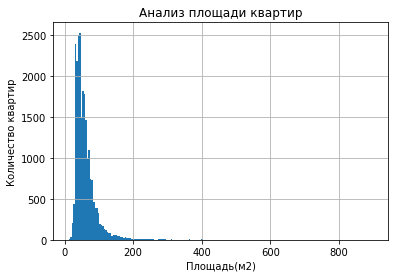

In [25]:
data['total_area'].hist(bins = 200)#площадь больниства квартир до 100 кв метров
plt.title("Анализ площади квартир")
plt.xlabel("Площадь(м2)")
plt.ylabel("Количество квартир")

Text(0, 0.5, 'Количество квартир')

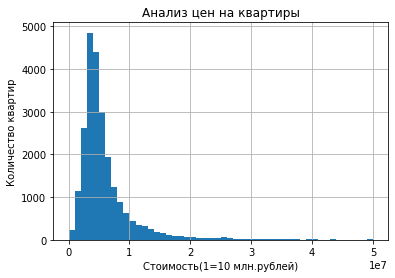

In [26]:
data['last_price'].hist(bins = 50, range = (0,50000000))#большинство квартир стоит до 10 млн рублей(старые данные)
plt.title("Анализ цен на квартиры")
plt.xlabel("Стоимость(1=10 млн.рублей)")
plt.ylabel("Количество квартир")

Text(0, 0.5, 'Количество квартир')

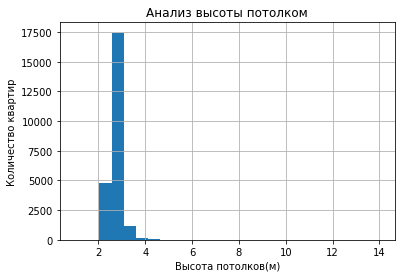

In [27]:
data['ceiling_height'].hist(bins = 25)# высота потолков до 4 метров, это обычные многоквартирные дома
plt.title("Анализ высоты потолком")
plt.xlabel("Высота потолков(м)")
plt.ylabel("Количество квартир")

* Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. 

Text(0, 0.5, 'Количество квартир')

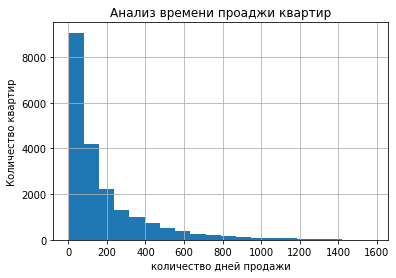

In [28]:
data['days_exposition'].hist(bins = 20)# ПРОДАЖА квартиры занимает чаще всего до 400 дней, большинство квартир продаются за 200 дней
plt.title("Анализ времени проаджи квартир")
plt.xlabel("количество дней продажи")
plt.ylabel("Количество квартир")

In [29]:
data['days_exposition'].mean()#среднее смещено из за выбросов квартир которые "висят" годами, их надо будет отсечь

180.88863436982163

In [30]:
data['days_exposition'].median()#чаще всего объявление висит до 100 дней

95.0

Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Для этого построим ящики с усами.

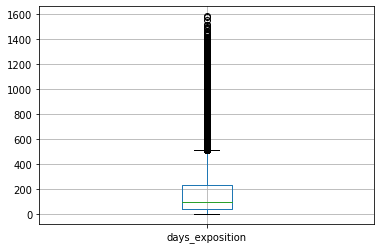

In [31]:
data.boxplot(column = 'days_exposition')#выбросы видны за усами где то от 500 дней(в целом можно отсечть данные свыше 600 дней они и смещают среднее)

Text(0, 0.5, 'Количество квартир')

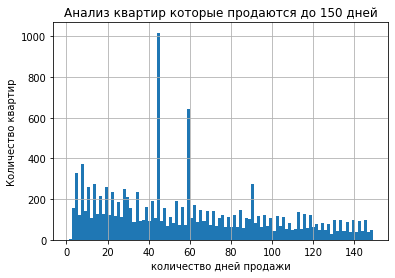

In [32]:
data[data['days_exposition'] <150]['days_exposition'].hist(bins = 100)
plt.title("Анализ квартир которые продаются до 150 дней")
plt.xlabel("количество дней продажи")
plt.ylabel("Количество квартир")

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Ответ:необычайно долго это свыше 500 дней, быстро до 100 дней


Уберем квартиры которые висят очень долго, и очень дорогие квартиры дороже 40 млн рублей, они в дальнейшем на графике мешали смотреть зависимости

In [33]:
data_clear = data.query('days_exposition < 550 and last_price<40000000')


In [34]:
data_clear = data_clear.drop(data_clear.loc[(data_clear['price_metr2'] < 70000) & (data_clear['locality_name'] == 'Санкт-Петербург')].index)
#удаляем индексы тех строк которые не подходят, я не заню квартир меньше 70 тысяч за квадрат в спб, это скорее всего мошенники

**Вывод:**

Удалили слишком долгие объявления и квартиры в СПБ и со слишком низкими ценами

Какие факторы больше всего влияют на стоимость квартиры? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f20809a10>,
      dtype=object)

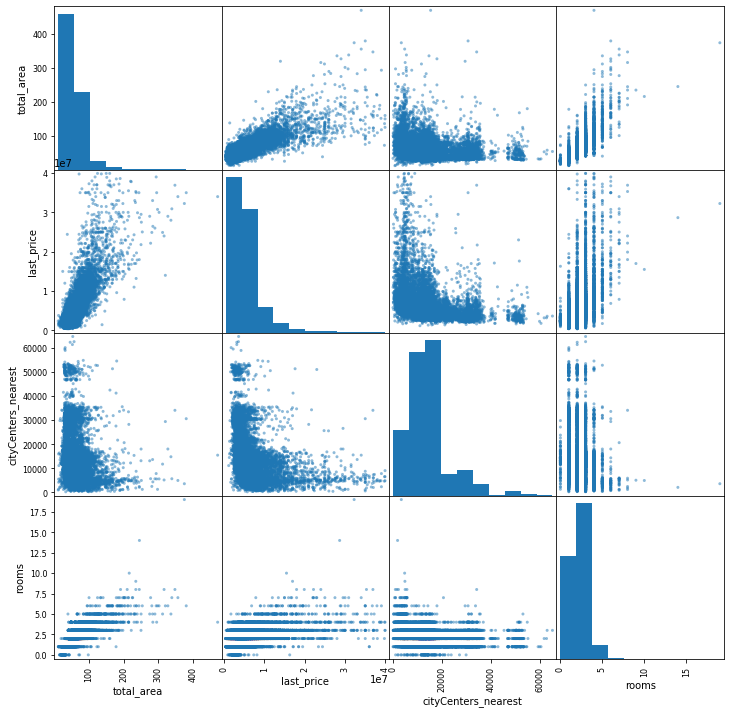

In [35]:
data_clear_analys = data_clear[['total_area','last_price','cityCenters_nearest','rooms']]# передадим в новый датафрейм столбцы для построения матрицы рассеивания
pd.plotting.scatter_matrix(data_clear_analys,figsize = (12,12))

In [36]:
data_clear_analys.corr()

,total_area,last_price,cityCenters_nearest,rooms
total_area,1.00,0.79,-0.21,0.79
last_price,0.79,1.00,-0.33,0.51
cityCenters_nearest,-0.21,-0.33,1.00,-0.16
rooms,0.79,0.51,-0.16,1.00


**Вывод:**

По графику я вижу зависимость между близостью к центру и цену(хотя коэф-т корреляции говорит об обратном, мне кажется эти правые выбросы это квартиры в СПБ) плюс нет дорогих квартир далеко от центра. Есть прямая зависмость между площадью и ценой, чуть меньше зависимость между числом комнат(возможно это из за того, что есть 2 к квартиры 40-45м и т.д.)

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Зависимость от даты размещения: дня недели, месяца и года.

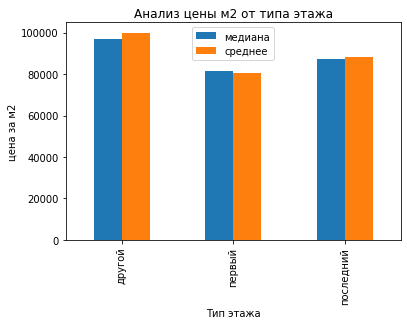

In [37]:
data_price_floor_type = data_clear.pivot_table(index = 'floor_type' , values = 'price_metr2', aggfunc = ['median','mean'])
data_price_floor_type.plot(kind='bar',legend =True)#видно что и средняя цена и медиана на квартирах на первых этажах ниже, выше котируются на других этажах, и дешевле квартиры на последнем этаже
plt.title("Анализ цены м2 от типа этажа")
plt.xlabel("Тип этажа")
plt.ylabel("цена за м2")
plt.legend(['медиана', 'среднее'])

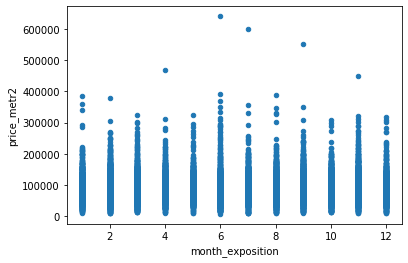

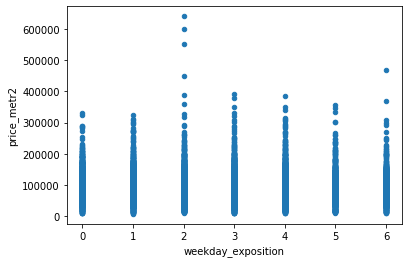

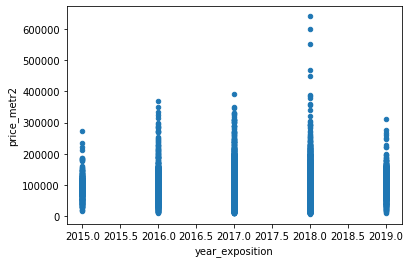

In [38]:
display(data_clear.plot(y ='price_metr2', x ='month_exposition', kind = 'scatter'))
display(data_clear.plot(y ='price_metr2', x ='weekday_exposition', kind = 'scatter'))
display(data_clear.plot(y ='price_metr2', x ='year_exposition', kind = 'scatter'))


Видно, что и средняя цена и медиана на квартирах на первых этажах ниже. Выше котируются на других этажах, и дешевле квартиры на последнем этаже, также больше дорогих квартир продавалось в 2018.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.



In [39]:
ps = data['locality_name'].value_counts().head(10)
data_clear_top10 = data_clear.query('locality_name in @ps.index')
data_clear_top10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr2,living_total,kitchen_total,month_exposition,weekday_exposition,year_exposition,floor_type
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,0.00,nan,81.00,"82,920.79",0.46,0.27,12,1,2018,первый
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,"100,000.00",0.32,0.41,6,1,2018,другой
6,6,"3,700,000.00",37.30,2017-11-02,1,2.70,26.00,10.60,6,False,...,0.00,nan,155.00,"99,195.71",0.28,0.39,11,3,2017,другой
8,20,"2,900,000.00",33.16,2018-05-23,1,2.70,27.00,15.43,26,False,...,nan,nan,189.00,"87,454.76",0.47,0.27,5,2,2018,другой
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,0.00,nan,289.00,"88,524.59",0.71,0.11,2,6,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,"3,200,000.00",39.00,2017-12-16,1,2.70,9.00,20.00,6,False,...,0.00,nan,38.00,"82,051.28",0.51,0.28,12,5,2017,другой
23688,19,"9,200,000.00",101.00,2019-04-01,3,3.05,15.00,63.00,12,False,...,0.00,nan,23.00,"91,089.11",0.62,0.15,4,0,2019,другой
23689,13,"3,550,000.00",35.30,2018-02-28,1,2.86,15.00,16.30,4,False,...,2.00,652.00,29.00,"100,566.57",0.46,0.26,2,2,2018,другой
23690,3,"5,500,000.00",52.00,2018-07-19,2,2.70,5.00,31.00,2,False,...,0.00,nan,15.00,"105,769.23",0.60,0.12,7,3,2018,другой


In [40]:
pv = data_clear_top10.groupby('locality_name').agg({'price_metr2':'mean'})# это среднее по среднему метру, так считать не совсем корректно
pv

,price_metr2
locality_name,
Всеволожск,"68,639.80"
Выборг,"56,980.85"
Гатчина,"68,125.55"
Колпино,"74,772.13"
Пушкин,"101,641.26"
Санкт-Петербург,"110,188.52"
деревня Кудрово,"92,602.35"
посёлок Мурино,"85,966.56"
посёлок Парголово,"89,199.55"


In [41]:
pv2 = data_clear_top10.groupby('locality_name')[['total_area','last_price']].sum()#это средний метр рассчитанный от общих цен / общую площадь
pv2['m2'] = pv2['last_price'] / pv2['total_area']
pv2.sort_values(by ='m2',ascending = False)

,total_area,last_price,m2
locality_name,,,
Санкт-Петербург,"722,354.73","81,069,875,839.00","112,230.01"
Пушкин,"16,186.35","1,671,377,364.00","103,258.45"
деревня Кудрово,"12,727.79","1,158,008,717.00","90,982.70"
посёлок Парголово,"14,782.75","1,275,888,309.00","86,309.27"
посёлок Мурино,"21,341.19","1,782,843,480.00","83,540.02"
посёлок Шушары,"20,931.91","1,583,647,799.00","75,657.11"
Колпино,"15,616.55","1,151,693,246.00","73,748.25"
Всеволожск,"16,982.20","1,145,912,402.00","67,477.26"
Гатчина,"12,406.02","833,934,060.00","67,220.11"


**Вывод:** 

Самые дорогие квартиры в СПБ и ближайшем пригороде, в топ 3 СПБ, Пушкин, Кудрово

Изучим предложения квартир. 
Для каждой квартиры есть информация о расстоянии до центра. 
Выделим квартиры в Санкт-Петербурге (locality_name). 

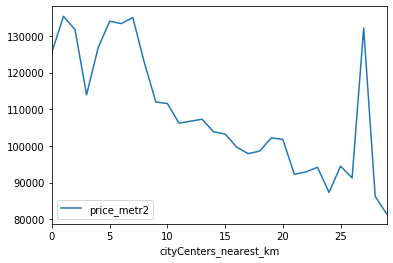

In [42]:
data_clear_SPB = data_clear_top10.query('locality_name == "Санкт-Петербург"').copy()
data_clear_SPB['cityCenters_nearest_km'] = round(data_clear_SPB['cityCenters_nearest']/ 1000)
#data_clear_SPB['price_km'] = data_clear_SPB['last_price'] / data_clear_SPB['cityCenters_nearest_km']

data_clear_SPB.pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr2').plot()



Вывод: Квартиры в центре это до 7 км

Выделим сегмент квартир в центре.

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 



In [43]:
data_clear_SPB_centr = data_clear_SPB.query('cityCenters_nearest_km<=7')
data_clear_SPB_centr.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_metr2,living_total,kitchen_total,month_exposition,weekday_exposition,year_exposition,cityCenters_nearest_km
count,"2,402.00","2,402.00","2,402.00","2,402.00","2,402.00","2,398.00","2,197.00","2,402.00","2,168.00","2,402.00",...,"2,402.00","1,730.00","2,402.00","2,402.00","2,197.00","2,168.00","2,402.00","2,402.00","2,402.00","2,402.00"
mean,9.91,"10,468,683.36",80.90,2.63,2.92,7.18,47.67,4.19,13.45,0.33,...,1.28,476.46,157.83,"130,446.45",0.58,0.18,6.69,2.55,"2,017.23",4.56
std,5.97,"6,633,126.39",41.10,1.32,0.33,3.99,28.22,3.06,7.66,0.77,...,1.08,275.06,137.77,"47,111.41",0.11,0.10,3.41,1.74,0.88,1.67
min,0.00,"1,686,000.00",12.00,0.00,2.40,2.00,2.00,1.00,2.00,0.00,...,0.00,22.00,3.00,"70,000.00",0.04,0.03,1.00,0.00,"2,015.00",0.00
25%,5.00,"6,250,000.00",52.20,2.00,2.70,5.00,29.00,2.00,8.70,0.00,...,0.00,236.25,53.00,"99,371.74",0.51,0.12,3.00,1.00,"2,017.00",4.00
50%,9.00,"8,400,000.00",72.15,2.00,2.75,6.00,42.00,3.00,11.40,0.00,...,1.00,471.00,110.00,"119,264.99",0.59,0.16,7.00,3.00,"2,017.00",5.00
75%,14.00,"12,300,000.00",97.35,3.00,3.10,9.00,59.00,5.00,15.60,0.00,...,2.00,688.75,232.00,"148,123.55",0.66,0.21,10.00,4.00,"2,018.00",6.00
max,50.00,"39,900,000.00",374.60,19.00,5.80,25.00,264.50,25.00,98.40,5.00,...,3.00,"1,293.00",549.00,"552,000.00",1.00,1.00,12.00,6.00,"2,019.00",7.00


In [44]:
data_clear_SPB_not_in_centr = data_clear_SPB.query('cityCenters_nearest_km > 7')
data_clear_SPB_not_in_centr.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_metr2,living_total,kitchen_total,month_exposition,weekday_exposition,year_exposition,cityCenters_nearest_km
count,"9,759.00","9,759.00","9,759.00","9,759.00","9,759.00","9,715.00","9,056.00","9,759.00","8,950.00","9,759.00",...,"9,759.00","4,289.00","9,759.00","9,759.00","9,056.00","8,950.00","9,759.00","9,759.00","9,759.00","9,759.00"
mean,10.03,"5,706,357.24",53.96,1.90,2.68,12.75,30.43,6.91,10.03,0.67,...,0.60,555.95,124.31,"105,115.99",0.56,0.20,6.62,2.59,"2,017.37",13.63
std,5.64,"3,102,112.81",23.05,0.90,0.21,6.41,14.41,5.17,4.73,1.00,...,0.80,279.49,122.89,"23,260.33",0.10,0.10,3.46,1.78,0.86,3.24
min,0.00,"1,190,000.00",13.00,0.00,1.00,1.00,3.00,1.00,2.00,0.00,...,0.00,13.00,1.00,"70,000.00",0.07,0.04,1.00,0.00,"2,015.00",8.00
25%,6.00,"3,900,000.00",39.00,1.00,2.60,9.00,18.13,3.00,7.00,0.00,...,0.00,344.00,36.00,"89,481.64",0.49,0.14,3.00,1.00,"2,017.00",11.00
50%,10.00,"4,800,000.00",48.00,2.00,2.70,12.00,29.00,5.00,9.00,0.00,...,0.00,552.00,78.00,"101,234.57",0.56,0.18,7.00,3.00,"2,017.00",13.00
75%,14.00,"6,450,000.00",63.00,3.00,2.70,17.00,38.50,9.00,11.30,1.00,...,1.00,771.00,172.00,"115,966.38",0.63,0.24,10.00,4.00,"2,018.00",16.00
max,50.00,"39,900,000.00",470.30,6.00,14.00,36.00,248.70,33.00,70.00,5.00,...,3.00,"1,337.00",549.00,"600,000.00",1.00,1.00,12.00,6.00,"2,019.00",29.00


***Вывод***

Квартиры в центре обладают большей площадью(на 24 метра больше медиана), чуть выше высота потолков, выше число комнат(в среднем на 1 комнату) и  выше цена как за квадратный метр(медиана больше на 19 тысяч за квадрат).

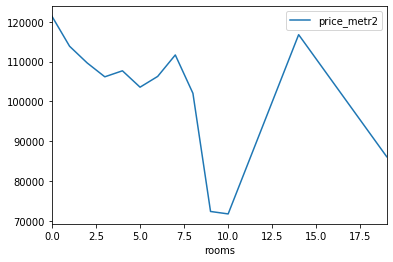

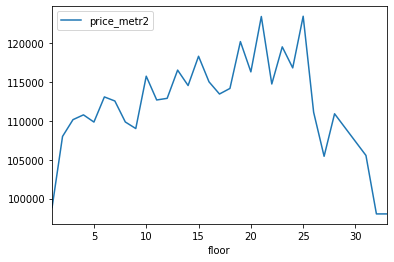

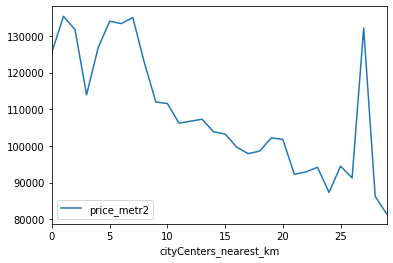

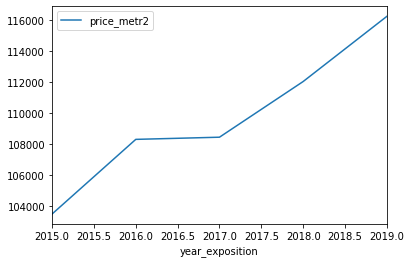

In [45]:
display(data_clear_SPB.pivot_table(index = 'rooms', values = 'price_metr2').plot())
display(data_clear_SPB.pivot_table(index = 'floor', values = 'price_metr2').plot())
display(data_clear_SPB.pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr2').plot())
display(data_clear_SPB.pivot_table(index = 'year_exposition', values = 'price_metr2').plot())


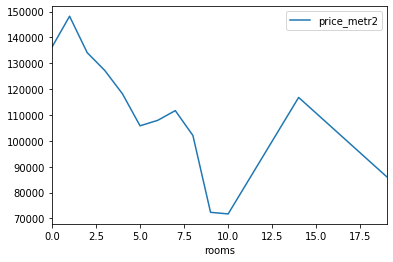

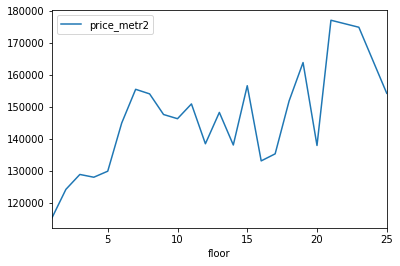

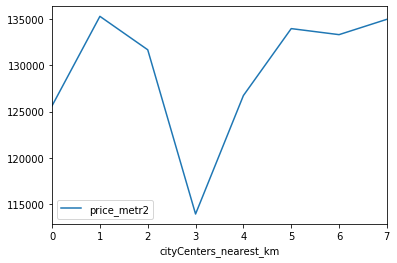

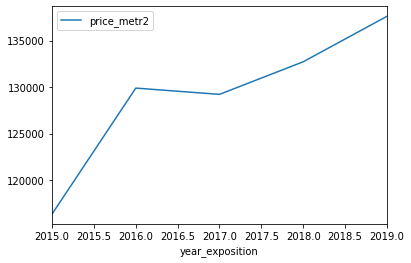

In [46]:
display(data_clear_SPB_centr.pivot_table(index = 'rooms', values = 'price_metr2').plot())
display(data_clear_SPB_centr.pivot_table(index = 'floor', values = 'price_metr2').plot())
display(data_clear_SPB_centr.pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr2').plot())
display(data_clear_SPB_centr.pivot_table(index = 'year_exposition', values = 'price_metr2').plot())

***Вывод***

В центре и в целом по городу одинаковые тренды

Правда есть разница в том, что в центре квартиы с высокой этажностью(выше 23) дороже, а в целом по городу они становятся дешевле

В центре города все до 7 км стоит примерно одинаково(кроме района в 3 км), в целом по городу чем дальше, тем дешевле
по чиcлу комнат графики почти идентичны(чем меньше комнат тем дороже цена за квадрат, студии и однушки легче продать)

В центре города с 2016 -2017 квартиры теряли в стоимости больше, чем в целом по городу


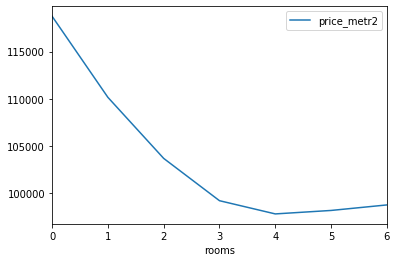

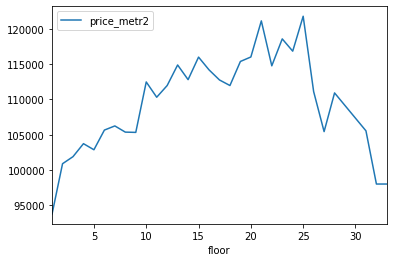

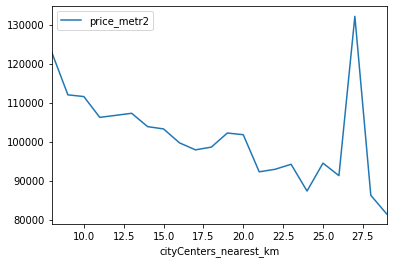

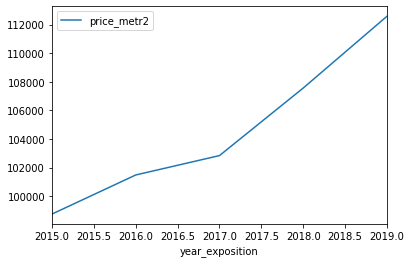

In [47]:
display(data_clear_SPB_not_in_centr.pivot_table(index = 'rooms', values = 'price_metr2').plot())
display(data_clear_SPB_not_in_centr.pivot_table(index = 'floor', values = 'price_metr2').plot())
display(data_clear_SPB_not_in_centr.pivot_table(index = 'cityCenters_nearest_km', values = 'price_metr2').plot())
display(data_clear_SPB_not_in_centr.pivot_table(index = 'year_exposition', values = 'price_metr2').plot())

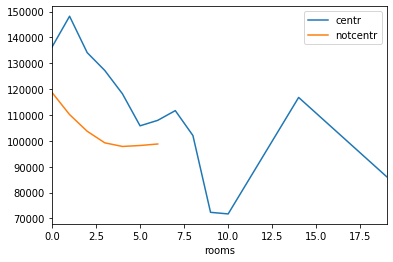

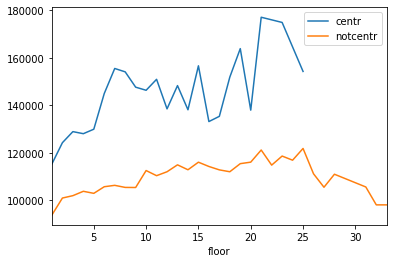

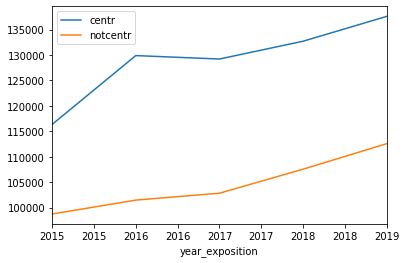

In [48]:
pw1 = data_clear_SPB_centr.pivot_table(index = 'rooms', values = 'price_metr2').plot()
ps1 = data_clear_SPB_not_in_centr.pivot_table(index = 'rooms', values = 'price_metr2').plot(ax =pw1)
plt.legend(['centr', 'notcentr'])

ps2 = data_clear_SPB_centr.pivot_table(index = 'floor', values = 'price_metr2').plot()
pw2 = data_clear_SPB_not_in_centr.pivot_table(index = 'floor', values = 'price_metr2').plot(ax =ps2)
plt.legend(['centr', 'notcentr'])

from matplotlib.ticker import FormatStrFormatter
ps4 = data_clear_SPB_centr.pivot_table(index = 'year_exposition', values = 'price_metr2').plot()
pw4 = data_clear_SPB_not_in_centr.pivot_table(index = 'year_exposition', values = 'price_metr2').plot(ax =ps4)
plt.legend(['centr', 'notcentr'])
pw4.xaxis.set_major_formatter(FormatStrFormatter('%d'))

***Вывод***

Без квартир в центре, видно что цены за квадрат всегда росли, чем дальше от центра тем дешевле, кроме выбросов от 25 км(там видимо коттеджи дорогие), от 10 до 25 этажа самые дорогие квартиры, также квартиры до 3 комнат, самые ликивдные(студии и однушки)

## Общий вывод

Была изучена база данных по недвижимости СПБ и Ленинградской области

* Как и ожидалось самые дорогие квартиры находятся в СПБ и ближайших пригородах(Кудрово, Пушкин(район СПБ), Парголово(район СПБ). Самые дорогие квартиры продаются ближе к центру, в них преобладают большие метражи и потолки(сталинки). Квартиры подальше от центра типичные панельки и монолит. Метраж в них меньше, потолки 2.5-2.7 м, цены чем дальше от центра, тем ниже. Самые дорогие квартиры, где меньше комнта(они более ликвидные)

* Отсекли квартиры очень дорогие(больше 40 млн) и очень дешевые(возможно мошеннические с ценой за метр меньше 70 тысяч в СПБ), а также те которые "висели" дольше 550 дней

* Рынок недвижимости был стабилен с 2016 - 2017(цены в целом по городу за квадрат не росли),но масс сегмент рос всегда.

